In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import folium
import datetime as dt

%matplotlib inline

In [3]:
df1 = pd.read_csv(r'FinalLandslides.csv')
del df1['Unnamed: 0']
df1.head()

,Date,country,landslide_type,trigger,landslide_size,population,latitude,longitude
0,05/30/2008,Italy,2,1,3,16800,44.6467,7.6639
1,05/30/2008,Italy,2,1,3,809,44.8098,7.1526
2,05/30/2008,Italy,2,1,3,2982,45.7513,7.3760
3,12/17/2008,Italy,2,1,3,169140,38.1102,15.6508
4,01/26/2009,Italy,2,1,3,959470,40.8403,14.2520


In [10]:
for i in range(len(df1)):
    if(df1['trigger'][i] == 1):
        df1['trigger'][i] = 'Precipitation'
    if(df1['trigger'][i] == 2):
        df1['trigger'][i] = 'Earthquake'
    if(df1['trigger'][i] == 0):
        df1['trigger'][i] = 'Unknown'
        
for i in range(len(df1)):
    if(df1['landslide_size'][i] == 1):
        df1['landslide_size'][i] = 'Very Large'
    if(df1['landslide_size'][i] == 2):
        df1['landslide_size'][i] = 'Large'
    if(df1['landslide_size'][i] == 3):
        df1['landslide_size'][i] = 'Medium'
    if(df1['landslide_size'][i] == 4):
        df1['landslide_size'][i] = 'Small'
        
for i in range(len(df1)):
    if(df1['landslide_type'][i] == 1):
        df1['landslide_type'][i] = 'Landslide'
    if(df1['landslide_type'][i] == 2):
        df1['landslide_type'][i] = 'Mudslide'
    if(df1['landslide_type'][i] == 3):
        df1['landslide_type'][i] = 'Rockfall'
        
df1.to_json('landslides.json')
df1.head()

,Date,country,landslide_type,trigger,landslide_size,population,latitude,longitude
0,05/30/2008,Italy,Mudslide,Precipitation,Medium,16800,44.6467,7.6639
1,05/30/2008,Italy,Mudslide,Precipitation,Medium,809,44.8098,7.1526
2,05/30/2008,Italy,Mudslide,Precipitation,Medium,2982,45.7513,7.3760
3,12/17/2008,Italy,Mudslide,Precipitation,Medium,169140,38.1102,15.6508
4,01/26/2009,Italy,Mudslide,Precipitation,Medium,959470,40.8403,14.2520


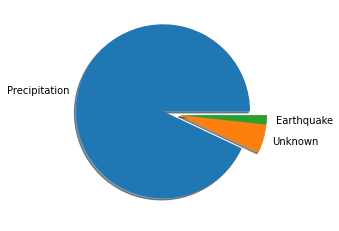

In [44]:
y = np.array([53, 3, 1])
mylabels = ["Precipitation", "Unknown", "Earthquake"]
myexplode = [0.2, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

In [41]:
df2 = pd.read_csv(r'final_era5.csv')
del df2['Unnamed: 0']
df2.to_json('daily_precipitation.json')
df2.head()

,total_precipitation,temperature_2m,date,station,latitude,longitude
0,0.022871,303.120056,09/07/2020,Abbadia_S_Salvatore,42.8767,11.6727
1,0.002566,303.894241,10/07/2020,Abbadia_S_Salvatore,42.8767,11.6727
2,2.597237,302.470184,11/07/2020,Abbadia_S_Salvatore,42.8767,11.6727
3,1.783773,300.284592,12/07/2020,Abbadia_S_Salvatore,42.8767,11.6727
4,0.138232,299.675354,13/07/2020,Abbadia_S_Salvatore,42.8767,11.6727


In [6]:
df3 = pd.read_excel(r'AvgAnnualPrecipitation.xlsx')
df3.to_json('avg_annual_precipitation.json')
df3.head()

,Days,Place,Region,Inches,Millimeters,Latitude,Longitude
0,75,Bologna,NE,26.4,671,44.4949,11.3426
1,76,Bolzano,NE,28.0,712,46.4983,11.3548
2,75,Cervia,NE,25.9,658,44.2635,12.3477
3,87,Monte Cimone,NE,24.2,615,44.1938,10.7015
4,88,Paganella,NE,30.1,764,46.1333,11.0333


In [35]:
x = []

for i in range(len(df3)):
    x.append("Annual precipitation: " + df3['Millimeters'][i] + "mm")
    
df3['Rain/year'] = x
df3.head()

,Days,Place,Region,Inches,Millimeters,Latitude,Longitude,Rain/year
0,75,Bologna,NE,26.4,671,44.4949,11.3426,Annual precipitation: 671mm
1,76,Bolzano,NE,28.0,712,46.4983,11.3548,Annual precipitation: 712mm
2,75,Cervia,NE,25.9,658,44.2635,12.3477,Annual precipitation: 658mm
3,87,Monte Cimone,NE,24.2,615,44.1938,10.7015,Annual precipitation: 615mm
4,88,Paganella,NE,30.1,764,46.1333,11.0333,Annual precipitation: 764mm


In [36]:
latitude = 41.8719
longitude = 12.5674
italy_map = folium.Map(location=[latitude, longitude], zoom_start= 5)

# instantiate a feature group for the incidents in the dataframe
rainy_days = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df3.Latitude, df3.Longitude):
    rainy_days.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df3.Latitude)
longitudes = list(df3.Longitude)
labels = list(df3['Rain/year'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(italy_map)    
    
# add incidents to map
italy_map.add_child(rainy_days)